In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [54]:
pop = pd.read_csv('data/GDP and population/china_population.txt')
GDP = pd.read_csv('data/GDP and population/china_gdp.csv')

In [55]:
pop = pop[['Year','Value']]
pop=pop.rename(columns={'Value':'Population'})

In [56]:
GDP=GDP.rename(columns={'Value':'GDP'})

In [57]:
pop_gdp = pd.merge(GDP,pop)

In [58]:
pop_gdp.head()

,Year,GDP,Population
0,1960,5.918412e+10,667070000
1,1961,4.955705e+10,660330000
2,1962,4.668518e+10,665770000
3,1963,5.009730e+10,682335000
4,1964,5.906225e+10,698355000


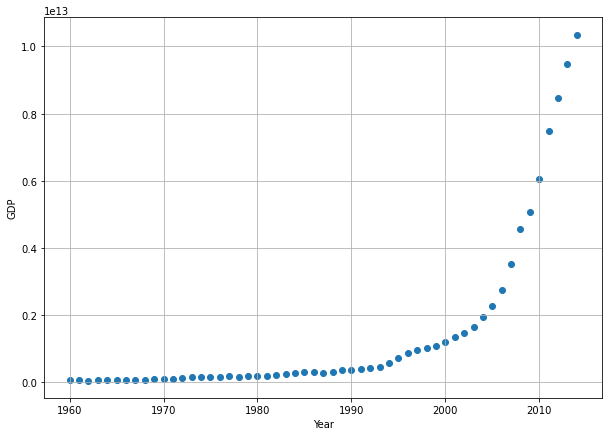

In [59]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.Year,pop_gdp.GDP)
plt.grid()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

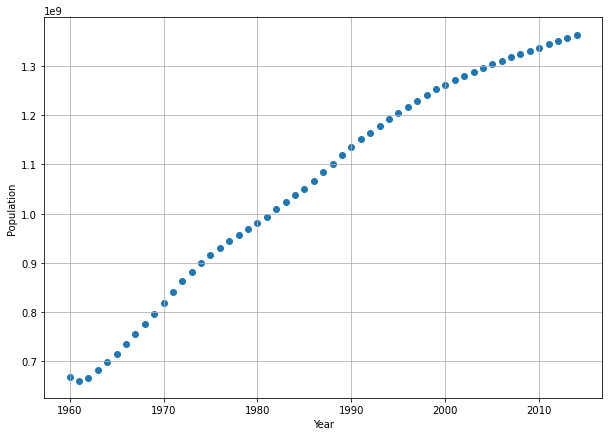

In [60]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.Year ,pop_gdp.Population)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

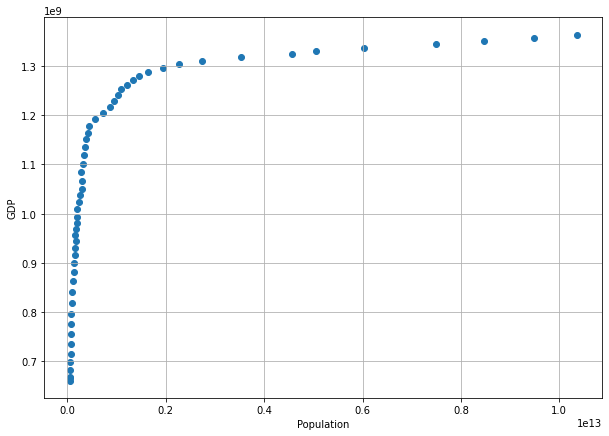

In [61]:
plt.figure(figsize=(10,7))
plt.scatter(pop_gdp.GDP,pop_gdp.Population )
plt.grid()
plt.ylabel('GDP')
plt.xlabel('Population')
plt.show()

In [62]:
pop_gdp.corr()

,Year,GDP,Population
Year,1.000000,0.723858,0.990633
GDP,0.723858,1.000000,0.634859
Population,0.990633,0.634859,1.000000


In [63]:
msk = np.random.rand(len(pop_gdp)) < 0.8
train = pop_gdp[msk]
test = pop_gdp[~msk]

In [64]:
Pop_y = np.asanyarray(train[['Population']])
GDP_X = np.asanyarray(train[['GDP']])

In [65]:
y_n =[]
for i in Pop_y :
    temp = ((i -  np.average(Pop_y))/(Pop_y.max() - Pop_y.min() ) )
    y_n = np.append(y_n,temp)

In [66]:
X_n =[]
for i in GDP_X :
    temp = ((i -  np.average(GDP_X))/(GDP_X.max() - GDP_X.min() ) )
    X_n = np.append(X_n,temp)

In [93]:
regr = linear_model.LinearRegression()
regr.fit(X_n.reshape(43,-1),y_n.reshape(43,-1))

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.82887639]]
Intercept:  [5.97843621e-18]


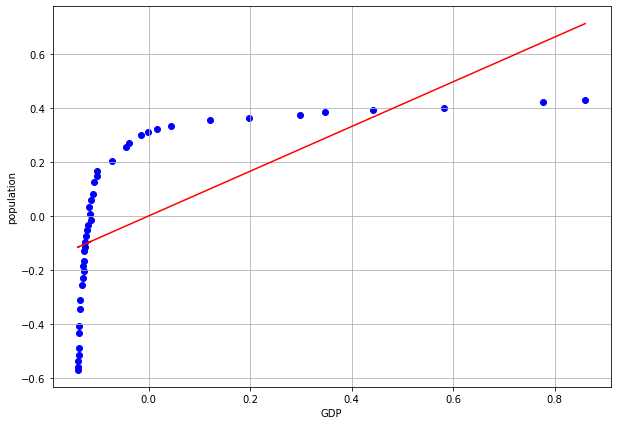

In [95]:
plt.figure(figsize=(10, 7))
plt.scatter(X_n, y_n,  color='blue')
plt.plot(X_n, regr.coef_[0][0]*X_n + regr.intercept_[0], '-r')
plt.xlabel("GDP")
plt.ylabel("population")
plt.grid()
plt.show()

In [97]:
Pop_y_t = np.asanyarray(test[['Population']])
GDP_X_t = np.asanyarray(test[['GDP']])

In [107]:
y_n_t =[]
for i in Pop_y_t :
    temp = ((i -  np.average(Pop_y_t))/(Pop_y_t.max() - Pop_y_t.min() ) )
    y_n_t = np.append(y_n_t,temp)

In [99]:
X_n_t =[]
for i in GDP_X_t :
    temp = ((i -  np.average(GDP_X_t))/(GDP_X_t.max() - GDP_X_t.min() ) )
    X_n_t = np.append(X_n_t,temp)

In [108]:
test_y_ = regr.predict(X_n_t.reshape(12,-1))

print("R2-score: %.2f" % r2_score(y_n_t , test_y_) )

R2-score: 0.32


In [111]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_n.reshape(43,-1))

In [112]:
X_poly

array([[ 1.00000000e+00, -1.39326023e-01,  1.94117407e-02],
       [ 1.00000000e+00, -1.39604625e-01,  1.94894514e-02],
       [ 1.00000000e+00, -1.39273613e-01,  1.93971392e-02],
       [ 1.00000000e+00, -1.38403917e-01,  1.91556443e-02],
       [ 1.00000000e+00, -1.37371055e-01,  1.88708066e-02],
       [ 1.00000000e+00, -1.37143286e-01,  1.88082808e-02],
       [ 1.00000000e+00, -1.37343470e-01,  1.88632288e-02],
       [ 1.00000000e+00, -1.35256508e-01,  1.82943229e-02],
       [ 1.00000000e+00, -1.34572019e-01,  1.81096282e-02],
       [ 1.00000000e+00, -1.30865450e-01,  1.71257660e-02],
       [ 1.00000000e+00, -1.30333360e-01,  1.69867847e-02],
       [ 1.00000000e+00, -1.28499107e-01,  1.65120204e-02],
       [ 1.00000000e+00, -1.29424084e-01,  1.67505936e-02],
       [ 1.00000000e+00, -1.27413895e-01,  1.62343006e-02],
       [ 1.00000000e+00, -1.26976618e-01,  1.61230616e-02],
       [ 1.00000000e+00, -1.25735516e-01,  1.58094199e-02],
       [ 1.00000000e+00, -1.25277717e-01

In [114]:
regrp = linear_model.LinearRegression()
y_train_ = regrp.fit(X_poly, y_n.reshape(43,-1))

print ('Coefficients: ', regrp.coef_)
print ('Intercept: ',regrp.intercept_)

Coefficients:  [[ 0.          2.01553604 -2.18474434]]
Intercept:  [0.13189011]


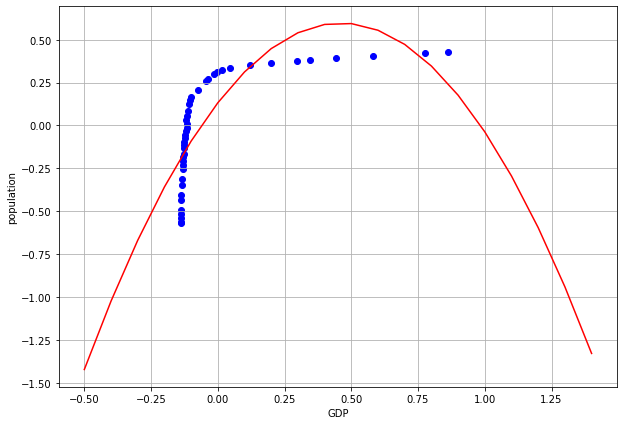

In [122]:
plt.figure(figsize=(10, 7))
plt.scatter(X_n, y_n,  color='blue')
XX = np.arange(-0.5 , 1.5 , 0.1)
yy = regrp.intercept_[0]+ regrp.coef_[0][1]*XX+ regrp.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.grid()
plt.xlabel("GDP")
plt.ylabel("population")
plt.show()

In [123]:
X_poly_test = poly.fit_transform(X_n_t.reshape(12,-1))
test_y_p = regrp.predict(X_poly_test)

In [132]:
print("R2-score: %.2f" % r2_score(y_n_t,test_y_p ) )

R2-score: 0.63
